# **Overview**

In this project, I will classify particles into gamma(signal) or hadrons(background). Given that the features are correlated, I will perform PCA to get a new set of features, and select the features that contain the most information. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: upload file

from google.colab import files
uploaded = files.upload()


Saving telescope.csv to telescope.csv


In [4]:
df = pd.read_csv('telescope.csv', index_col=0)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#removing the nan values
df= df.dropna()

In [6]:
#extract the numerical columns
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

data matrix indicates the predictors while class is target.

In [7]:
#Create correlation matrix
correlation_matrix = data_matrix.corr()

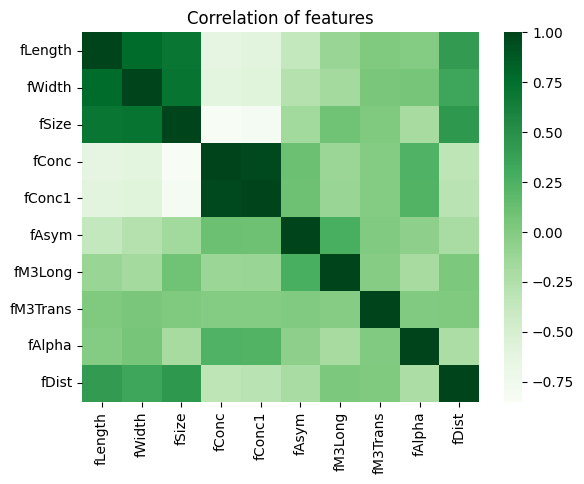

<Figure size 640x480 with 0 Axes>

In [8]:
ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Correlation of features')
plt.show()
plt.clf()

Features such as fLength, fWidth and fSzie have strong correlation with each other.

In [9]:
# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [10]:
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

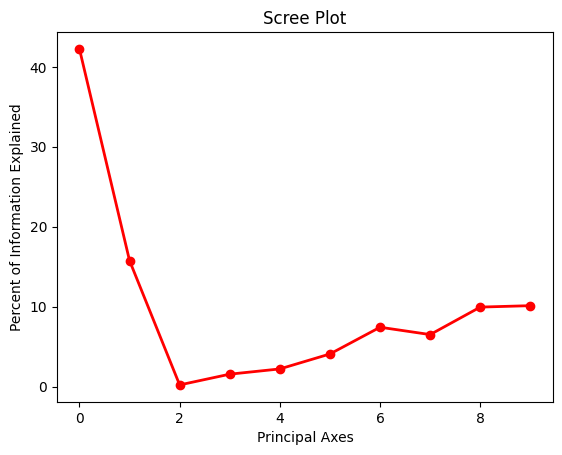

<Figure size 640x480 with 0 Axes>

In [11]:
#Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()
plt.clf()

The plot shows that 1, 6 or 8 principle components have higher information percentage than other number of components. It is also possible to reach 95% of information by using cumulative sum of the information proportions.

In [12]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

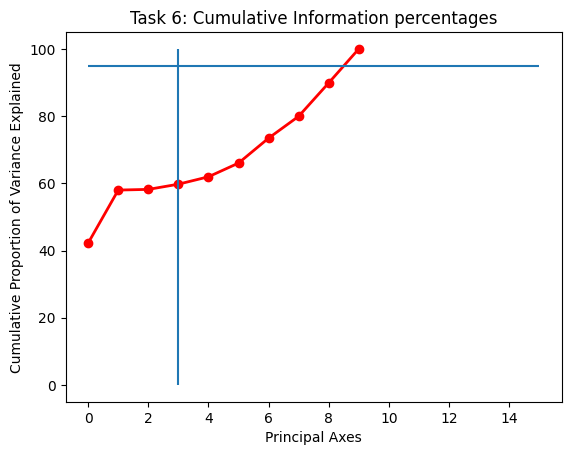

<Figure size 640x480 with 0 Axes>

In [13]:
#Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()
plt.clf()

The y-axis represents the cumulative proportion of variance explained, reaching 100% at the top. As you move along the x-axis (Principal Axes), the line rises, indicating that each additional component explains more of the total variance in the data. This plot suggests that around 4 to 8 principal components explain a significant proportion (over 95%) of the variance in the dataset, with diminishing returns beyond this.
Depending on your specific goal (e.g., dimension reduction), it is recommended to choose the first 4-8 components to capture the bulk of the variance while reducing complexity.

In [14]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [15]:
#Perform PCA by fitting and transforming the data matrix.
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
# Find the principal components
pca = PCA()
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 10
Number of features in the principal components: 10


In [16]:
# Calculate the eigenvalues from the singular values and extract the eigenvectors.

singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

In [17]:
# Eigenvectors are in the property `.components_` as row vectors. To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_
eigenvectors = eigenvectors.T

In [18]:
 #Extract the variance ratios, which are equivalent to the eigenvalue proportions we calculated earlier.

principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

In [19]:
# Initialize a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)

# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


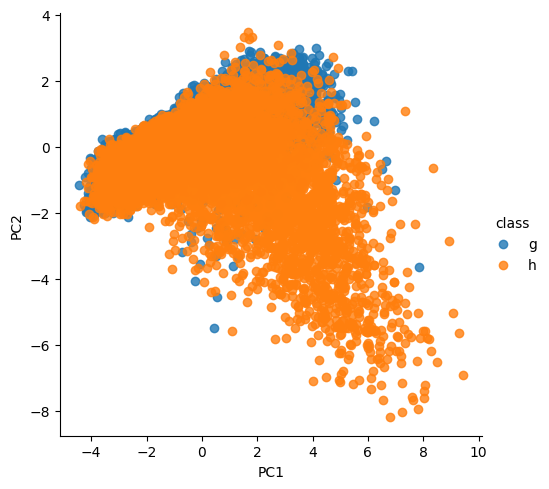

<Figure size 640x480 with 0 Axes>

In [20]:
#Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()
plt.clf()

#the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes

In [25]:
# Fit the transformed features onto the classifier and generate a score.
# Get principal components with 4 features
# Perform PCA using 2 components
pca_1 = PCA(n_components=2)

# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train)

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


In [26]:
# Now, fit the classifier with the first two feture of the original data matrix and generate a score.
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]

# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)

# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 original features: {score_2}')

Score for model with 2 original features: 0.7192926557272582


Dimensionality reduction: the dimensionality of the data is reduced through selecting a specific number of principal components (to 2).
'
Model training and evaluation: Linear Support Vector Classifier (SVC) is trained on the principal components and evaluated its performance using a test set.

The result shows that using the principal components obtained from PCA resulted in a much better score compared to using a subset of the original features in your classification task.

This project has demonstrated the effectiveness of PCA
 in reducing the dimensionality of the data while preserving important information. This led to improved performance in the classification task.